<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Removing Duplicates**


Estimated time needed: **30** minutes


## Introduction


In this lab, you will focus on data wrangling, an important step in preparing data for analysis. Data wrangling involves cleaning and organizing data to make it suitable for analysis. One key task in this process is removing duplicate entries, which are repeated entries that can distort analysis and lead to inaccurate conclusions.  


## Objectives


In this lab you will perform the following:


1. Identify duplicate rows  in the dataset.
2. Use suitable techniques to remove duplicate rows and verify the removal.
3. Summarize how to handle missing values appropriately.
4. Use ConvertedCompYearly to normalize compensation data.
   


### Install the Required Libraries


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 130.5 MB/s eta 0:00:00


### Step 1: Import Required Libraries


In [2]:
import pandas as pd

### Step 2: Load the Dataset into a DataFrame



load the dataset using pd.read_csv()


In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

**Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:**



#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.


In [4]:
## Write your code here
# Count the number of duplicate rows in the dataset
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows in the dataset: {num_duplicates}")

# Display the first few duplicate rows
duplicate_rows = df[df.duplicated()]
print("First few duplicate rows:")
print(duplicate_rows.head())

Number of duplicate rows in the dataset: 0
First few duplicate rows:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, Offic

### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
   1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [5]:
## Write your code here
# Remove duplicate rows from the dataset
df_cleaned = df.drop_duplicates()

# Verify the removal by counting the number of duplicate rows after removal
num_duplicates_after_removal = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows after removal: {num_duplicates_after_removal}")

Number of duplicate rows after removal: 0


### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.


In [6]:
## Write your code here
# Identify missing values for all columns
missing_values = df.isnull().sum()
print("Missing values for all columns:")
print(missing_values)

# Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value
most_frequent_value = df['EdLevel'].mode()[0]
df['EdLevel'].fillna(most_frequent_value, inplace=True)

# Verify the imputation
missing_values_after_imputation = df['EdLevel'].isnull().sum()
print(f"Missing values in 'EdLevel' column after imputation: {missing_values_after_imputation}")

Missing values for all columns:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64
Missing values in 'EdLevel' column after imputation: 0


/tmp/ipykernel_369/2634118435.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EdLevel'].fillna(most_frequent_value, inplace=True)


### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


In [8]:
## Write your code here
import pandas as pd

# Load the dataset from the local file
df = pd.read_csv(file_path)

# Check for missing values in the ConvertedCompYearly column
missing_values = df['ConvertedCompYearly'].isnull().sum()
print(f"Number of missing values in 'ConvertedCompYearly' column: {missing_values}")

# Handle missing values by imputing with the median value
median_value = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly'].fillna(median_value, inplace=True)

# Verify the imputation
missing_values_after_imputation = df['ConvertedCompYearly'].isnull().sum()
print(f"Number of missing values in 'ConvertedCompYearly' column after imputation: {missing_values_after_imputation}")

# Now you can proceed with compensation analysis using the ConvertedCompYearly column

Number of missing values in 'ConvertedCompYearly' column: 42002
Number of missing values in 'ConvertedCompYearly' column after imputation: 0


/tmp/ipykernel_369/4038772794.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(median_value, inplace=True)


### Step 7: Summary and Next Steps


**In this lab, you focused on identifying and removing duplicate rows.**

- You handled missing values by imputing the most frequent value in a chosen column.

- You used ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis, consider exploring other columns or visualizing the cleaned dataset.


/tmp/ipykernel_369/2018408430.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['EdLevel'].fillna(most_frequent_value, inplace=True)
/tmp/ipykernel_369/2018408430.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

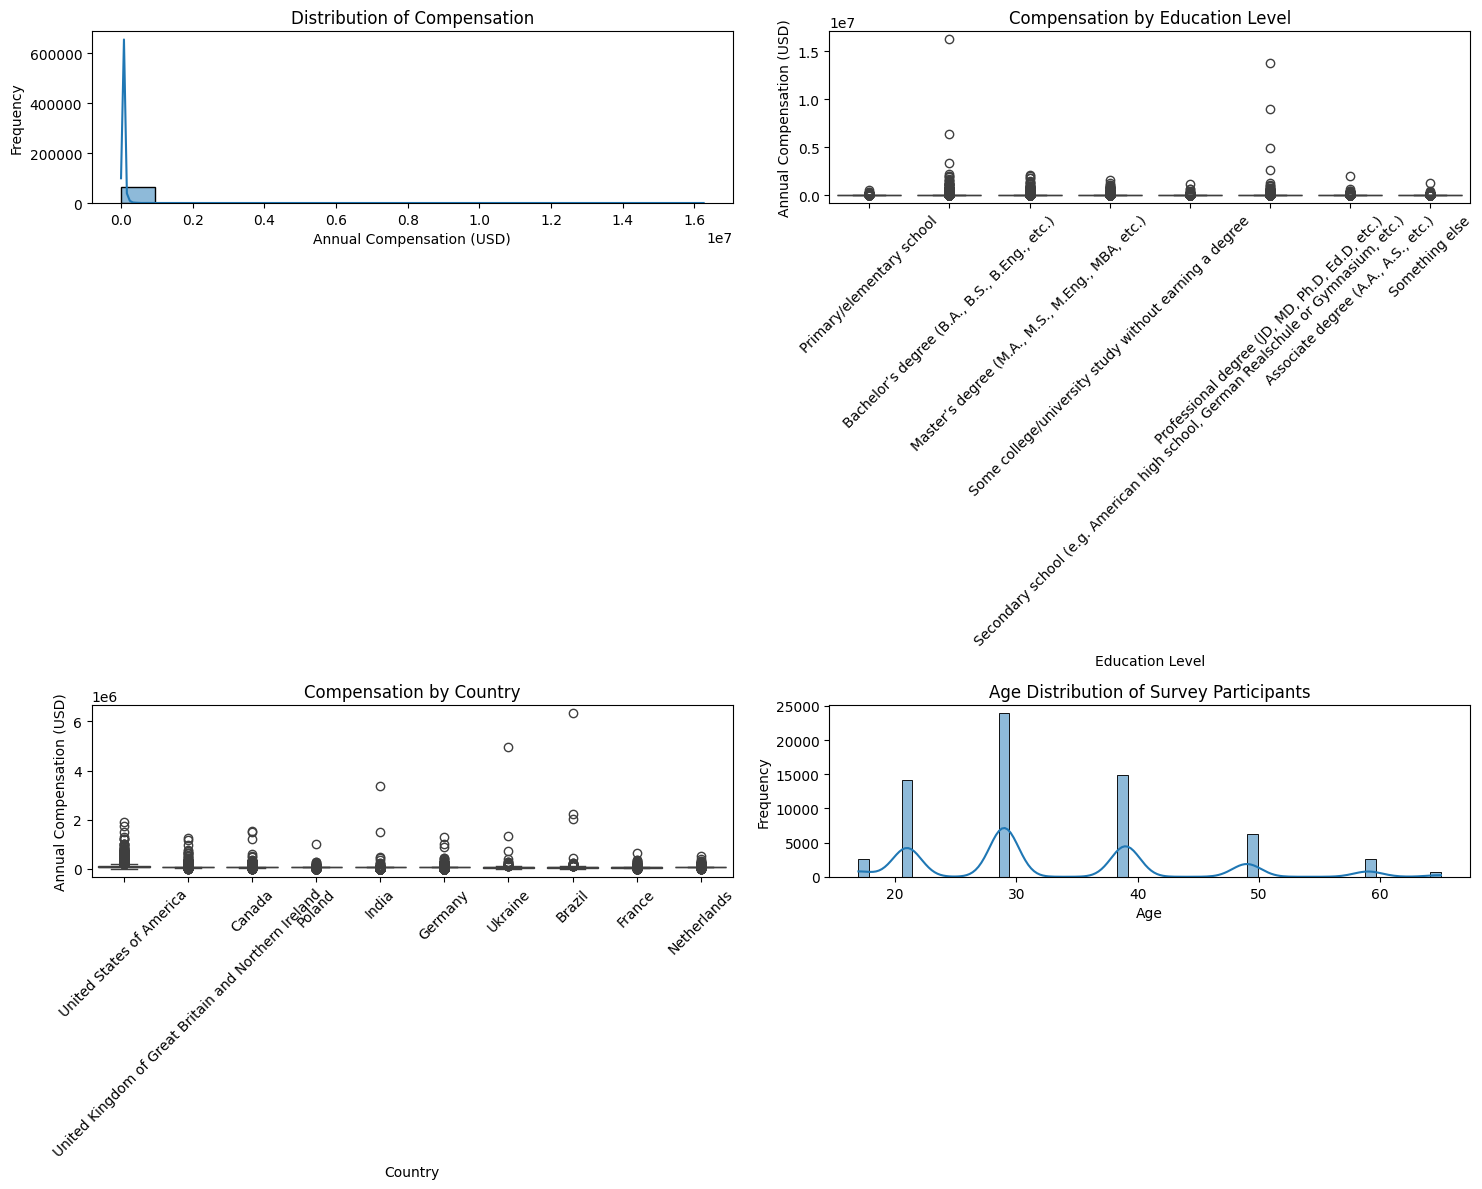

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the local file
df = pd.read_csv(file_path)

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Handle missing values in EdLevel by imputing with the most frequent value
most_frequent_value = df_cleaned['EdLevel'].mode()[0]
df_cleaned['EdLevel'].fillna(most_frequent_value, inplace=True)

# Handle missing values in ConvertedCompYearly by imputing with the median value
median_value = df_cleaned['ConvertedCompYearly'].median()
df_cleaned['ConvertedCompYearly'].fillna(median_value, inplace=True)

# Convert age ranges to numeric values
def convert_age(age):
    if 'Under 18' in age:
        return 17
    elif '18-24' in age:
        return 21
    elif '25-34' in age:
        return 29
    elif '35-44' in age:
        return 39
    elif '45-54' in age:
        return 49
    elif '55-64' in age:
        return 59
    elif '65' in age:
        return 65
    else:
        return None

df_cleaned['Age_numeric'] = df_cleaned['Age'].apply(convert_age)

# Create a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Distribution of Compensation
sns.histplot(df_cleaned['ConvertedCompYearly'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Compensation')
axs[0, 0].set_xlabel('Annual Compensation (USD)')
axs[0, 0].set_ylabel('Frequency')

# Compensation by Education Level
sns.boxplot(x='EdLevel', y='ConvertedCompYearly', data=df_cleaned, ax=axs[0, 1])
axs[0, 1].set_title('Compensation by Education Level')
axs[0, 1].set_xlabel('Education Level')
axs[0, 1].set_ylabel('Annual Compensation (USD)')
axs[0, 1].tick_params(axis='x', rotation=45)

# Compensation by Country
top_countries = df_cleaned['Country'].value_counts().index[:10]
df_top_countries = df_cleaned[df_cleaned['Country'].isin(top_countries)]
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_top_countries, ax=axs[1, 0])
axs[1, 0].set_title('Compensation by Country')
axs[1, 0].set_xlabel('Country')
axs[1, 0].set_ylabel('Annual Compensation (USD)')
axs[1, 0].tick_params(axis='x', rotation=45)

# Visualization of Age Distribution
sns.histplot(df_cleaned['Age_numeric'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Age Distribution of Survey Participants')
axs[1, 1].set_xlabel('Age')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

<!--
## Change Log

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|

--!>


Copyright © IBM Corporation. All rights reserved.
